# CODE 1.1

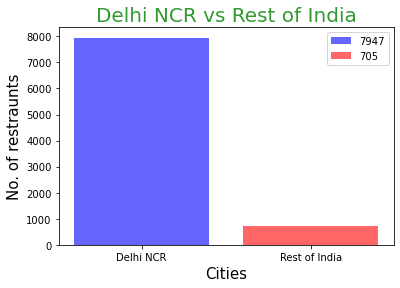

In [4]:
#1. 1) Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df1 = df[ (df['City']=='New Delhi') | (df['City']=='Ghaziabad') | (df['City']=='Noida') | (df['City']=='Gurgaon') |
         (df['City']=='Faridabad')]

total_city = df.City.count()
ncr_city = df1.City.count()
rest_city = total_city - ncr_city

x = ['Delhi NCR', 'Rest of India']
y = [ncr_city,rest_city]
plt.bar(x[0],y[0],color='b',alpha=0.6)
plt.bar(x[1],y[1],color='r',alpha=0.6)
plt.ylabel("No. of restraunts",size=15)
plt.xlabel("Cities",size=15)
plt.title('Delhi NCR vs Rest of India',fontsize=20, color='green',alpha=0.8)
plt.legend(y)
plt.show()

# EXPLANATION 1.1

#### we first read the file and put conditions on the cities to be used for countin the number of restaurants in ncr as ncr consists of ghaziabad, new delhi, faridabad, noida and gurgaon. after counting this, we substract the number of restaurants in delhi from the total number of restaurants to give an idea of how many restaurants are there in the rest of inndia

# CODE 1.2

In [5]:
df['City'].replace(['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad'],'Delhi NCR',inplace=True)

cuisines_NCR = df[df['City']=='Delhi NCR']['Cuisines'].str.split(', ')
set1=set()
for i in cuisines_NCR:
    set1.update(i)
    
cuisines_RI = df[df['City']!='Delhi NCR']['Cuisines'].str.split(', ')
set2 = set()
for i in cuisines_RI:
    set2.update(i)
    
print(set2-set1)

{'Cajun', 'Malwani', 'German', 'BBQ'}


In [6]:
#to check Check using Zomato API whether this cuisines are actually
#not served in restaurants of Delhi-NCR or just it due to incomplete dataset.
import requests

header = {'user-key': '6eacc55f385ade30c93e9d0259691e14'}
data = {'city_id':'1'}
response = requests.get('https://developers.zomato.com/api/v2.1/cuisines',headers=header,params=data)
data = response.json()

set3 = set() 
for i in data['cuisines'] :
    set3.add(i['cuisine']['cuisine_name']) 
for i in set2-set1 :
    if i in set3:
        print(i)

BBQ


# EXPLANATION 1.2

#### from this it is clear that the dataset is incomplete as BBQ cuisine is being served in Delhi NCR

# CODE 1.3

In [7]:
#top 10 cuisines served by maximum number of restaurants in Delhi NCR
NCR = []
for i in cuisines_NCR:
    NCR.extend(i)
    
dct = {}
for i in NCR:
    dct[i] = dct.get(i,0) + 1
    
key1 = sorted(dct, key=dct.get, reverse=True)
print('*********Top 10 cuisines served by maximum number of restaurants in Delhi NCR**********')
ncr_count = []
ncr_cname = []
for i in key1[:10]:
    print(i, dct[i])
    ncr_count.append(dct[i])
    ncr_cname.append(i)

#top 10 cuisines served by maximum number of restaurants in  rest of India
ROI = []
for i in cuisines_RI:
    ROI.extend(i)
    
dct1 = {}
for i in ROI:
    dct1[i] = dct1.get(i,0) + 1
    
key2 = sorted(dct1, key=dct1.get, reverse=True)
print('**********Top 10 cuisines served by maximum number of restaurants in Rest of India**********')
roi_count = []
roi_cname = []
for i in key2[:10]:
    print(i, dct1[i])
    roi_count.append(dct1[i])
    roi_cname.append(i)

*********Top 10 cuisines served by maximum number of restaurants in Delhi NCR**********
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
**********Top 10 cuisines served by maximum number of restaurants in Rest of India**********
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


# EXPLANATION 1.3

#### To find the top 10 cuisines served by maximum number of restaurants in delhi, we create a dictionary to store the number of  restuarants serving the particular cuisine. Then we display the dictionary in reverse so that the names and numbers are displayed in decending order. the same is repeated for the cuisines served by max number of restaurants in rest of india

# CODE 1.4

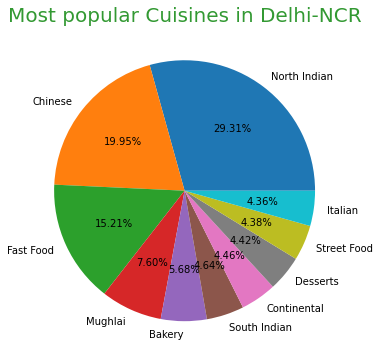

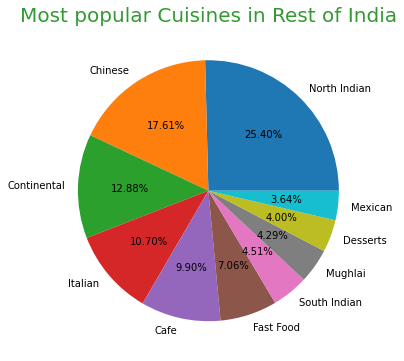

In [8]:
#using ncr_count, ncr_cname, roi_count and roi_cname for plotting graph
plt.figure(figsize=(12,6))
plt.pie(ncr_count,labels=ncr_cname,autopct='%0.2f%%',radius=1)
plt.title('Most popular Cuisines in Delhi-NCR',fontsize=20, color='green',alpha=0.8)
plt.show()

plt.figure(figsize=(12,6))
plt.pie(roi_count,labels=roi_cname,autopct='%0.2f%%',radius=1)
plt.title('Most popular Cuisines in Rest of India',fontsize=20, color='green',alpha=0.8)
plt.show()

# EXPLANATION 1.4

#### 1. The number of rrestaurants registered on zomato are much more in delhi ncr than rest of india.  2. Chinese and north indian are the two most populare cuisines in india and delhi-ncr. 3. While fast food is the third most liked cuisine in delhi-ncr, continental is the third most liked cuisine in rest of india

# CODE 2.1.1

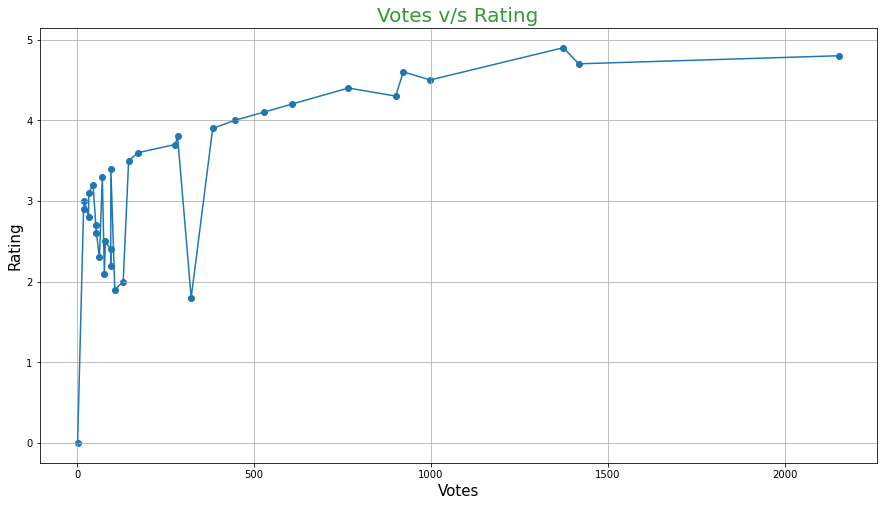

In [9]:
#Number of Votes given Restaurant
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Votes'],inplace=True)
data = df["Votes"].groupby(df['Aggregate rating']).mean()
c = data.sort_values(ascending=True)
rating = c.index
votes = c.values
plt.figure(figsize=(15,8))
plt.scatter(votes,rating)
plt.plot(votes,rating)
plt.title('Votes v/s Rating',fontsize=20, color='green',alpha=0.8)
plt.xlabel('Votes',size=15)
plt.ylabel('Rating',size=15)
plt.grid()
plt.show()

# EXPLANATION 2.1.1

#### INFERENCE: The rating is between or below 3.5 and 4.5 if the votes are below or equal to 1000. It can be seen that as the rating increases , there is increase in number of votes. The highest rating is given by Votes that are  around 1400.

# CODE 2.1.2

In [15]:
#Restaurant serving more number of cuisines

from collections import OrderedDict
df = pd.read_csv('data/zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Cuisines'],inplace=True)

Average User Rating of Restuarants serving 1 Cuisines is 2.1
Average User Rating of Restuarants serving 2 Cuisines is 2.6
Average User Rating of Restuarants serving 3 Cuisines is 2.9
Average User Rating of Restuarants serving 4 Cuisines is 3.4
Average User Rating of Restuarants serving 5 Cuisines is 3.5
Average User Rating of Restuarants serving 6 Cuisines is 3.7
Average User Rating of Restuarants serving 7 Cuisines is 3.6
Average User Rating of Restuarants serving 8 Cuisines is 3.3


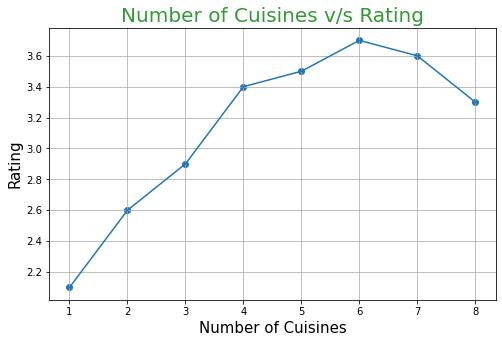

In [47]:

dct = {}
cuisines = np.array(df['Cuisines'].str.split(', '))
Agg_rating = np.array(df["Aggregate rating"])

for i in range(len(Agg_rating)):
    x  = len(cuisines[i])
    if x not in dct:
        dct[x] = [[Agg_rating[i]],1]
    else:
        dct[x][0].append(Agg_rating[i])
        dct[x][1]+=1
dct1 = OrderedDict(sorted(dct.items()))

nos_varities = list(dct1.keys())
aggregate_rating = (list(dct1.values()))

rating=[]
for i in aggregate_rating:
    avg_rating = round(sum(i[0])/i[1],1)
    rating.append([nos_varities,avg_rating])
w = []    
for i in range(len(rating)):
    print('Average User Rating of Restuarants serving',nos_varities[i],'Cuisines is',rating[i][1])
    w.append(rating[i][1])
plt.figure(figsize=(8,5))
plt.scatter(nos_varities,w)
plt.plot(nos_varities,w)
plt.title('Number of Cuisines v/s Rating',fontsize=20, color='green',alpha=0.8)
plt.xlabel('Number of Cuisines',size=15)
plt.ylabel('Rating',size=15)
plt.grid()
plt.show()

# EXPLANATION 2.1.2 

#### As number of cuisines increase, the rating increases till the number of cuisines are 6. After that there's a small decrease. The rating is the most for restaurants serving 6 number of cuisines. 

# CODE 2.1.3

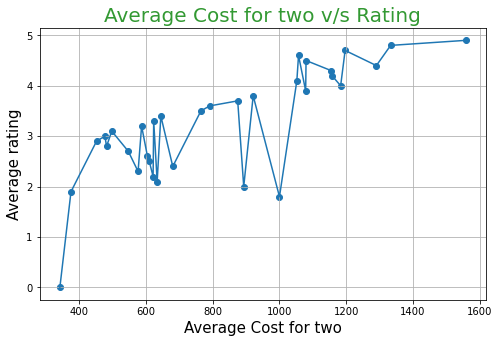

In [49]:
df = pd.read_csv('data/zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Average Cost for two'],inplace=True)
df = df[df['Average Cost for two']!=0]
data = df["Average Cost for two"].groupby(df['Aggregate rating']).mean()
W = data.sort_values(ascending=True)
rating = W.index
avg_cost = W.values

plt.figure(figsize=(8,5))
plt.scatter(avg_cost,rating)
plt.plot(avg_cost,rating)
plt.title('Average Cost for two v/s Rating',fontsize=20, color='green',alpha=0.8)
plt.ylabel("Average rating",size=15)
plt.xlabel("Average Cost for two",size=15)
plt.grid()
plt.show()

# EXPLANATION 2.1.3

#### The rating is increasing drastically when cost increases from 0 to 1000. Then the rating increases gradually. This shows that there is an overall increase in the rating if the average cost increases

# CODE 2.1.4

Top 10 Rated Cuisines are:
Persian 4.6
German 4.35
Modern Indian 4.28
Charcoal Grill 4.18
Parsi 4.1
Iranian 4.07
Burmese 4.05
Steak 4.05
Spanish 4.03
Sri Lankan 4.0


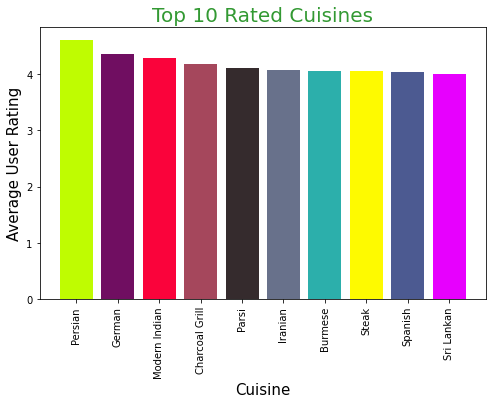

Lowest 10 Rated Cuisines are :
Cuisine Varies 0.0
Armenian 1.3
Afghani 1.42
Awadhi 1.57
Moroccan 1.62
Nepalese 1.66
Drinks Only 1.75
North Eastern 1.8
Pakistani 1.9
Mithai 2.07


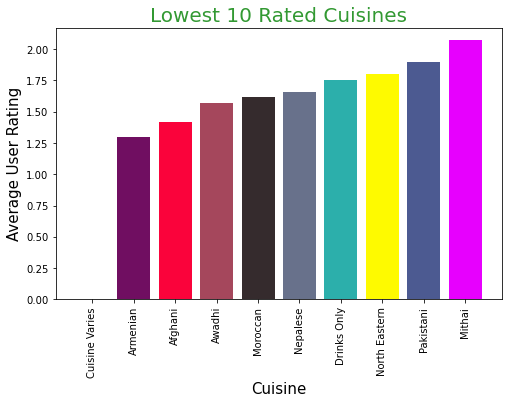

In [55]:
df = pd.read_csv('data/zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Cuisines'],inplace=True)
dct = {}
cuisines = np.array(df['Cuisines'].str.split(', '))
rating = np.array(df["Aggregate rating"])

for i in range(len(Agg_rating)):
    cus = cuisines[i]
    for c in cus:
        c = c.strip()
        if c in dct:
            l = dct[c]
            l.append(rating[i])
            dct[c] = l
        else:
            dct[c] = [rating[i]]
for k, v in dct.items():
    dct[k] = sum(v)/len(v)
    
cuisine = np.array(list(dct.keys()))
rating = np.array(list(dct.values()))
rating = np.round(rating, decimals=2)

ind = rating.argsort()[::-1]
ind = ind[:10]

cuisine_t10 = cuisine[ind]
rate_t10 = rating[ind]

print('Top 10 Rated Cuisines are:')
for i in range(10):
    print(cuisine_t10[i],rate_t10[i])

color = ['#BFFC01','#700E61','#FA033B','#A5475C','#352B2D','#68718B','#2CAFAB','#FEFA00','#4C5A91','#E700FE']
plt.figure(figsize=(8,5))    
plt.bar(cuisine_t10, rate_t10, color=color)
plt.ylabel('Average User Rating',size=15)
plt.xlabel('Cuisine',size=15)
plt.title('Top 10 Rated Cuisines',fontsize=20, color='green',alpha=0.8)
plt.xticks(rotation=90)

plt.show()

ind = rating.argsort()
ind = ind[:10]

cuisine_l10 = cuisine[ind]
rate_l10 = rating[ind]

print('Lowest 10 Rated Cuisines are :')
for i in range(10):
    print(cuisine_l10[i],rate_l10[i])
    
plt.figure(figsize=(8,5))    
plt.bar(cuisine_l10, rate_l10, color=color)
plt.ylabel('Average User Rating',size=15)
plt.xlabel('Cuisine',size=15)
plt.title('Lowest 10 Rated Cuisines',fontsize=20, color='green',alpha=0.8)
plt.xticks(rotation = 90)
plt.show()

# EXPLANATION 2.1.4

#### The first graph is showing the ten most liked cuisines while the second one is showing the ten least liked cuisines. Dictionaries has been used to store the name of the cuisine and the rating along with it

# CODE 2.2

***Top 10 localities with top weighted restaurant rating***
Hotel Clarks Amer, Malviya Nagar 4.9
Aminabad 4.9
Friends Colony 4.89
Powai 4.84
Kirlampudi Layout 4.82
Deccan Gymkhana 4.8
Express Avenue Mall,  Royapettah 4.8
Banjara Hills 4.72
Sector 5, Salt Lake 4.71
Riverside Mall, Gomti Nagar 4.7


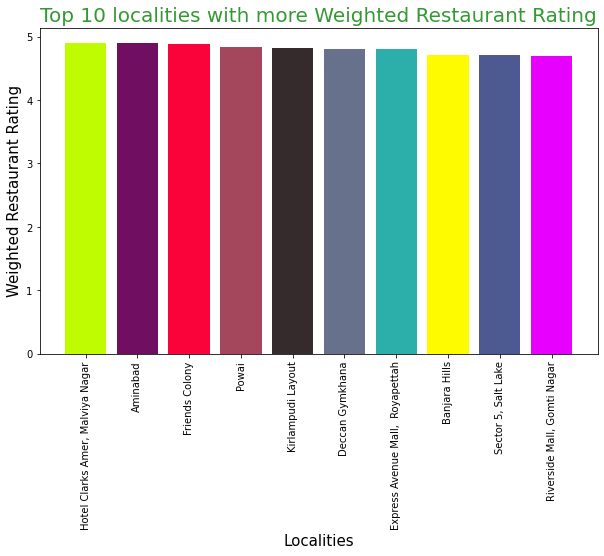

In [57]:
df = pd.read_csv('data\zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Votes','Locality'],inplace=True)
x = df.groupby(by = 'Locality').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
y = df.groupby(by = 'Locality').apply(lambda x: (x['Votes'].sum()))
weighted_rating = x/y
c=weighted_rating.sort_values(ascending=False)
locality = np.array(c.index[:10])
wt_rating = np.array(c.values[:10])
print('***Top 10 localities with top weighted restaurant rating***')
for i in range(10):
    print(locality[i],round(wt_rating[i],2))
    
color = ['#BFFC01','#700E61','#FA033B','#A5475C','#352B2D','#68718B','#2CAFAB','#FEFA00','#4C5A91','#E700FE']
plt.figure(figsize=(10,6))    
plt.bar(locality, wt_rating, color=color)
plt.ylabel('Weighted Restaurant Rating',size=15)
plt.xlabel('Localities',size=15)
plt.title('Top 10 localities with more Weighted Restaurant Rating',fontsize=20, color='green',alpha=0.8)
plt.xticks(rotation=90)
plt.show()

# EXPLANATION 2.2

#### The weighted restaurant rating of top ten localities are almost the same. 

# CODE 3.1

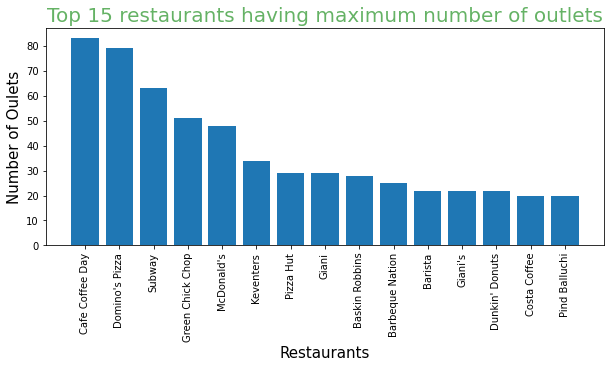

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
outlet = df['Restaurant Name'].value_counts().head(15)
name = list(outlet.index)
count = list(outlet.values)
plt.figure(figsize=(10,4))
plt.bar(name,count)
plt.xlabel('Restaurants',size=15)
plt.ylabel('Number of Oulets',size=15)
plt.xticks(rotation=90)
plt.title("Top 15 restaurants having maximum number of outlets", fontsize=20, color='green',alpha=0.6)

plt.show()


# EXPLANATION 3.1

#### Cafe Coffee Day has the most number of outlets while pind balluchi and Costa coffee seem to have the least

# CODE 3.2

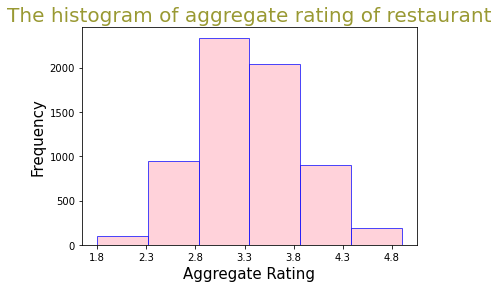

In [64]:
df1 = df.copy()
df1.dropna(subset=['Aggregate rating'],inplace=True)
df1 = df1[df1['Aggregate rating']!=0]
rating = df1['Aggregate rating']
rating = list(rating)
xt = np.arange(1.8, 5, 0.5)
plt.hist(rating,bins=6,edgecolor='BLUE',color='PINK',alpha=0.7)
plt.title('The histogram of aggregate rating of restaurant',fontsize=20, color='olive',alpha=0.8)
plt.ylabel('Frequency',size=15)
plt.xlabel('Aggregate Rating',size=15)
plt.xticks(xt)
plt.show()

# EXPLANATION 3.2

#### most of the restaurants are rated between 2.6 to 3.8 (approx). Maximum rating(5) has been given to A VERY less number of restaurants

# CODE 3.3

Top 10 restaurants in the data with the highest number of votes
1 Toit 10934
2 Truffles 9667
3 Hauz Khas Social 7931
4 Peter Cat 7574
5 AB's - Absolute Barbecues 6907
6 Barbeque Nation 5966
7 Big Brewsky 5705
8 AB's - Absolute Barbecues 5434
9 The Black Pearl 5385
10 BarBQ 5288


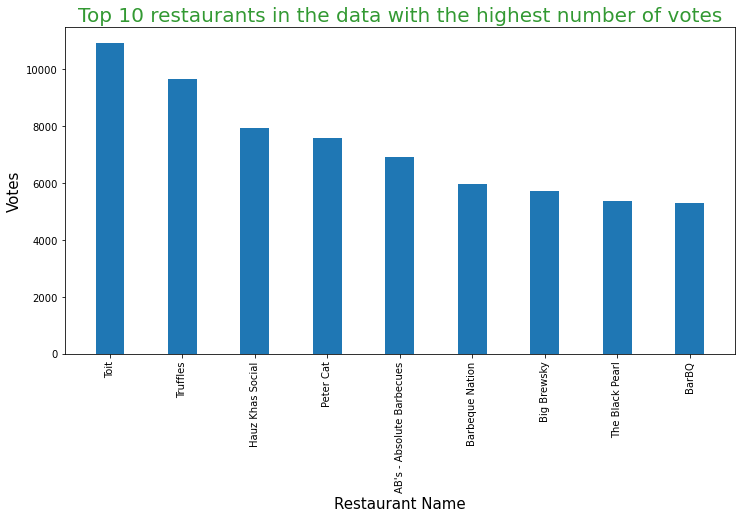

In [67]:
df2 = df.copy()
df2 = df2.sort_values(by ='Votes', ascending=False).head(10)
res_name = list(df2['Restaurant Name'])
votes = list(df2['Votes'])
print('Top 10 restaurants in the data with the highest number of votes')
for i in range(10):
    print(i+1,res_name[i],votes[i])

plt.figure(figsize=(12,6))
plt.bar(res_name,votes,width=0.4)
plt.ylabel("Votes",size=15)
plt.xlabel("Restaurant Name",size=15)
plt.title('Top 10 restaurants in the data with the highest number of votes',fontsize=20, color='green',alpha=0.8)
plt.xticks(rotation = 90)
plt.show()

# EXPLANATION 3.3 

#### Toit is the most voted restaurant while BarbQ and the black pearl are the least voted

# CODE 3.4

***Top 10 cuisines present in restaurants in the USA**********
American 112
Seafood 59
Burger 49
Sandwich 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


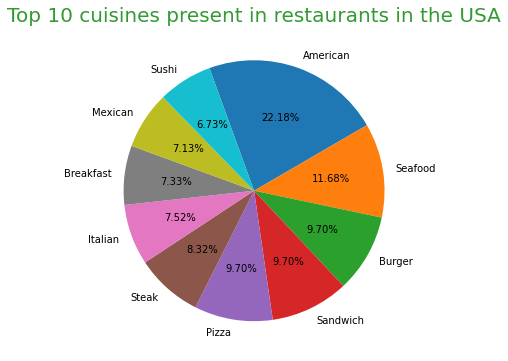

In [68]:
df = pd.read_csv('data/zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==216]
df.dropna(subset=['Cuisines'],inplace=True)
cuisines_usa = df['Cuisines'].str.split(', ')
cuisines = []
for i in cuisines_usa:
    cuisines.extend(i)
    
dct = {}
for i in cuisines:
    dct[i] = dct.get(i,0) + 1
    
key = sorted(dct, key=dct.get, reverse=True)
print('***Top 10 cuisines present in restaurants in the USA**********')
count = []
cuisines_name = []
for i in key[:10]:
    print(i, dct[i])
    count.append(dct[i])
    cuisines_name.append(i)
plt.figure(figsize=(12,6))
plt.pie(count,labels=cuisines_name,autopct='%0.2f%%',counterclock=False,startangle=110)
plt.title('Top 10 cuisines present in restaurants in the USA',fontsize=20, color='green',alpha=0.8)
plt.show()


# EXPLANATION 3.4

#### American is the most popular cuisines in USA. Seafood, Burger,sandwich are also more popular cuisines in USA.

# CODE 3.5

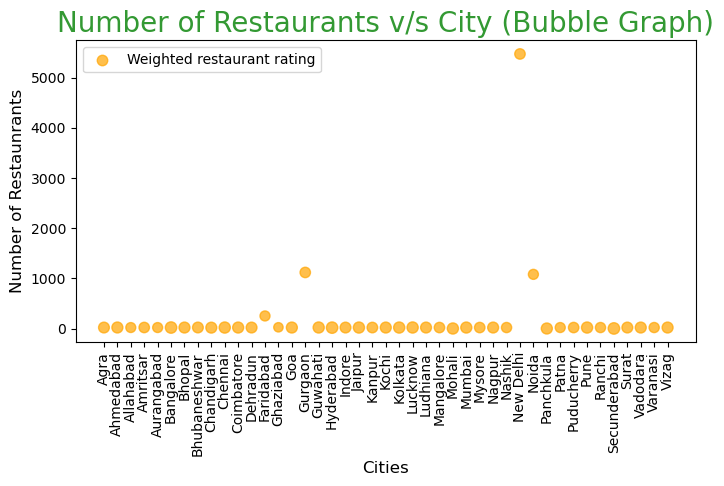

In [71]:
df = pd.read_csv('data/zomato.csv',encoding='ISO-8859-1')
df = df[df['Country Code']==1]
df.dropna(subset=['Aggregate rating','Votes','City'],inplace=True)
x = df.groupby(by = 'City').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
y = df.groupby(by = 'City').apply(lambda x: (x['Votes'].sum()))
restaurant_count = df.groupby(by = 'City').count()['Restaurant Name']
weighted_rating = x/y

# plotting bubble graph and keeping weighted rating as size of the bubble.
plt.figure(num=None, figsize=(8,4), dpi=100, facecolor='w', edgecolor='orange')
plt.scatter( restaurant_count.index,restaurant_count.values,s = weighted_rating*15, alpha = 0.7, c = 'orange')
plt.title('Number of Restaurants v/s City (Bubble Graph)',fontsize=20, color='green',alpha=0.8)
plt.xlabel('Cities', size = 12)
plt.ylabel('Number of Restaunrants', size = 12)
plt.legend(['Weighted restaurant rating'],loc ='upper left')
plt.xticks(rotation = 90)
plt.show()

# EXPLANATION 3.5

#### The weighted restaurant rating is shown. the  number of restaurants are most in New delhi.